<center><h1> Project One </h1></center>



## Trends in land temperature in different states in India ##




### Introduction ###
We will be considering the dataset "Climate Change: Earth Surface Temperature Data" which explores the global land temperatures since 1750. The data is retrieved from https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data. The data is compiled in several different files according to how it was collected and compiled. For example, the data is divided by  City, Major City, States, and Countries. The data published on Kaggle was a repackaged version of 1.6 billion temperatures combined by the Berkeley Earth Surface Temperature Study. 

For this particular notebook, I'll be noticing the trends in the average land temperature in different states of India. We will see if the average temperature (Y) in different states (X1) in India from the year 1796 to 2013 (X2). 

### Research Question - The question that I will aim to answer using the this data is whether we notice an increase in land temperatures in different states in India over time. 

In [1]:
# !pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes
# !pip install qeds
import pandas as pd
import numpy as np
import qeds
import matplotlib.pyplot as plt

In [2]:
# Read data into a dataframe called country_df
country_data_raw = pd.read_csv("GlobalLandTemperaturesByState.csv")
country_df = pd.DataFrame(country_data_raw)

In [3]:
# Cleaning the dataframe by first selecting only the data with the Country as India
cond_ = country_df["Country"].isin(["India"])

# Assigning the filtered data to a variable called india_data
india_data = country_df[cond_]

# Dropping the Country Name and Average Temperature Uncertainty columns from the data 
# and assigning it to a new variable called y
y = india_data.drop(columns=["AverageTemperatureUncertainty", "Country"])

# Dropping entries with no data and resetting index and assigning to variable 
# called new
y = y.dropna().reset_index()
new = y.copy()
new = new.drop(columns=["index"])

# Converting the date in the column dt to a uniform DateTimeIndex
dates = pd.DatetimeIndex(new['dt'])

In [4]:
new.loc[:, 'dt'] = dates
new

dt  AverageTemperature                State
0     1796-01-01              26.534  Andaman And Nicobar
1     1796-02-01              26.294  Andaman And Nicobar
2     1796-03-01              26.180  Andaman And Nicobar
3     1796-04-01              27.942  Andaman And Nicobar
4     1796-05-01              28.651  Andaman And Nicobar
...          ...                 ...                  ...
81615 2013-01-04              28.707          West Bengal
81616 2013-01-05              29.694          West Bengal
81617 2013-01-06              29.628          West Bengal
81618 2013-01-07              29.115          West Bengal
81619 2013-01-08              28.686          West Bengal

[81620 rows x 3 columns]

The above Dataframe 'new' shows yearly average temperature for the different states in India

### Summary Statistics ###
The summary statistics of average temperature, average temperature of each state, and average temperature of each year.

In [5]:
# Summary statistics of average temperature
new.describe()

AverageTemperature
count        81620.000000
mean            22.534576
std              7.749321
min            -11.984000
25%             19.063000
50%             25.094500
75%             27.628000
max             36.339000

The above table represents the Summary Statistics of the Average Temperature from the DataFrame 'new'.

In [6]:
# Average temperature over the years by State
state_temp = new[["State", "AverageTemperature"]].groupby("State").mean()
state_temp

AverageTemperature
State                                     
Andaman And Nicobar              27.231677
Andhra Pradesh                   27.090003
Arunachal Pradesh                13.795670
Assam                            21.875561
Bihar                            24.486945
Chandigarh                       13.381667
Chhattisgarh                     25.589014
Dadra And Nagar Haveli           24.969918
Daman And Diu                    26.274003
Delhi                            25.165861
Goa                              25.755925
Gujarat                          26.296188
Haryana                          24.236843
Himachal Pradesh                  9.098241
Jammu And Kashmir                 3.204062
Jharkhand                        24.929374
Karnataka                        25.622263
Kerala                           26.319626
Madhya Pradesh                   25.261987
Maharashtra                      25.933388
Manipur                          21.186684
Meghalaya                        23.438018
Mizoram                          23.315388
Nagaland                         21.398759
Orissa                           25.927605
Puducherry                       27.266897
Punjab                           23.338020
Rajasthan                        25.725266
Sikkim                            3.149101
Tamil Nadu                       26.667812
Tripura                          24.750007
Uttar Pradesh                    24.645434
Uttaranchal                      14.697141
West Bengal                      24.915779

The above table shows the average temperature from the year 1796 to 2013 for all the states in India

In [7]:
# Average temperature by year
yearly_temp = new.groupby(pd.Grouper(key="dt", freq="A")).mean().dropna()
yearly_temp

AverageTemperature
dt                            
1796-12-31           24.388083
1797-12-31           25.407240
1798-12-31           24.129472
1799-12-31           24.663863
1800-12-31           24.629430
...                        ...
2009-12-31           23.468466
2010-12-31           23.387196
2011-12-31           22.821696
2012-12-31           23.007659
2013-12-31           23.720890

[213 rows x 1 columns]

The above table shows yearly the average temperature.

In [8]:
# Creating a final copy of data where it is sorted by Year and State.
# Gives the average temperature for each state that year
final_data = new.groupby([pd.Grouper(key='dt', freq='A'), 
                          pd.Grouper(key = 'State')]).mean().copy()
final_data

AverageTemperature
dt         State                                     
1796-12-31 Andaman And Nicobar              27.070833
           Andhra Pradesh                   26.750750
           Bihar                            24.334167
           Chhattisgarh                     25.349167
           Dadra And Nagar Haveli           24.750333
...                                               ...
2013-12-31 Tamil Nadu                       28.445375
           Tripura                          25.909250
           Uttar Pradesh                    26.044250
           Uttaranchal                      15.991125
           West Bengal                      26.237375

[6878 rows x 1 columns]

The above DataFrame 'final_data' shows the average temperature for each individual state every year.

### Plotting the relation between Y and the different Xs separately ###

<AxesSubplot:xlabel='dt'>

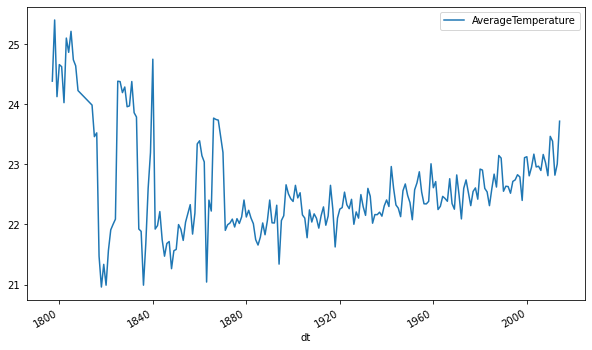

In [9]:
# Creating a line graph of X2 (Years) and Y (average temperature)
yearly_temp.plot(figsize=(10,6))

###### The above graph depicts a line graph with the dt (date) on the x axis and the average temperatures on the Y axis. The graph shows some extreme points up until 1870s. Post that we see a gradual increase in the average temperatures over the years. #####

<AxesSubplot:xlabel='State'>

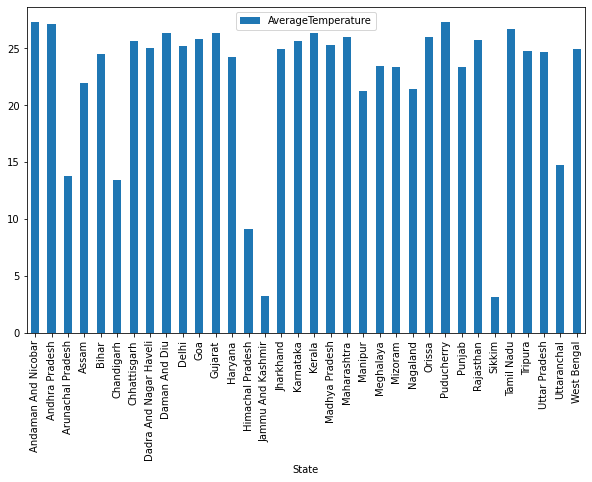

In [10]:
# Creating a bar graph of X1 (States) and Y (average temperature)
state_temp.plot(figsize=(10,6), kind="bar")

##### The graph depicts the temperature of different states in India averaged over the years. We don't notice any trend here, probably because the data here has no time component to it. The temperatures are averaged over all the years. ######

In [11]:
# Here we are transposing the data so that we can get the date on the y-axis
u = final_data.unstack(level=0).T
u

State                          Andaman And Nicobar  Andhra Pradesh  \
                   dt                                                
AverageTemperature 1796-12-31            27.070833       26.750750   
                   1797-12-31            27.163400       27.755800   
                   1798-12-31            27.374600       26.518800   
                   1799-12-31            27.336167       27.062417   
                   1800-12-31            27.281167       27.097417   
...                                            ...             ...   
                   2009-12-31            28.153917       28.223917   
                   2010-12-31            28.489833       27.918667   
                   2011-12-31            27.976500       27.624083   
                   2012-12-31            28.251083       28.180083   
                   2013-12-31            28.505875       28.980625   

State                          Arunachal Pradesh      Assam      Bihar  \
                   dt                                                    
AverageTemperature 1796-12-31                NaN        NaN  24.334167   
                   1797-12-31                NaN        NaN  25.722600   
                   1798-12-31                NaN        NaN  23.846300   
                   1799-12-31                NaN        NaN  24.594917   
                   1800-12-31                NaN        NaN  24.531250   
...                                          ...        ...        ...   
                   2009-12-31          15.147250  23.074500  25.682167   
                   2010-12-31          14.699167  22.704167  25.865000   
                   2011-12-31          14.535417  22.480667  24.871000   
                   2012-12-31          14.274417  22.235000  25.231250   
                   2013-12-31          15.447750  23.367375  25.844875   

State                          Chandigarh  Chhattisgarh  \
                   dt                                     
AverageTemperature 1796-12-31         NaN     25.349167   
                   1797-12-31         NaN     26.481200   
                   1798-12-31         NaN     24.697600   
                   1799-12-31         NaN     25.634667   
                   1800-12-31         NaN     25.619500   
...                                   ...           ...   
                   2009-12-31   14.629833     26.901167   
                   2010-12-31   14.723250     26.759167   
                   2011-12-31   14.101333     25.935667   
                   2012-12-31   14.194417     26.410333   
                   2013-12-31   14.741875     27.355250   

State                          Dadra And Nagar Haveli  Daman And Diu  \
                   dt                                                  
AverageTemperature 1796-12-31               24.750333      26.087083   
                   1797-12-31               25.624700      26.857600   
                   1798-12-31               24.411100      26.127200   
                   1799-12-31               25.029500      26.357167   
                   1800-12-31               25.001583      26.311333   
...                                               ...            ...   
                   2009-12-31               26.339833      27.637417   
                   2010-12-31               26.196917      27.420750   
                   2011-12-31               25.633833      27.061083   
                   2012-12-31               25.566583      26.825417   
                   2013-12-31               26.093375      26.827375   

State                              Delhi  ...     Orissa  Puducherry  \
                   dt                     ...                          
AverageTemperature 1796-12-31  25.030250  ...  25.692833   26.894583   
                   1797-12-31  26.711900  ...  26.664600   27.741600   
                   1798-12-31  24.289700  ...  25.314000   27.132900   
                   1799-12-31  25.284167  ...  25.977667   27

The above DataFrame 'u' is just the the DataFrame 'final_data' but the x and the y labels shifted. So we have a MultiIndex - 'AverageTemperature and Date' as the Index - and the States as the Columns

<AxesSubplot:xlabel='None,dt'>

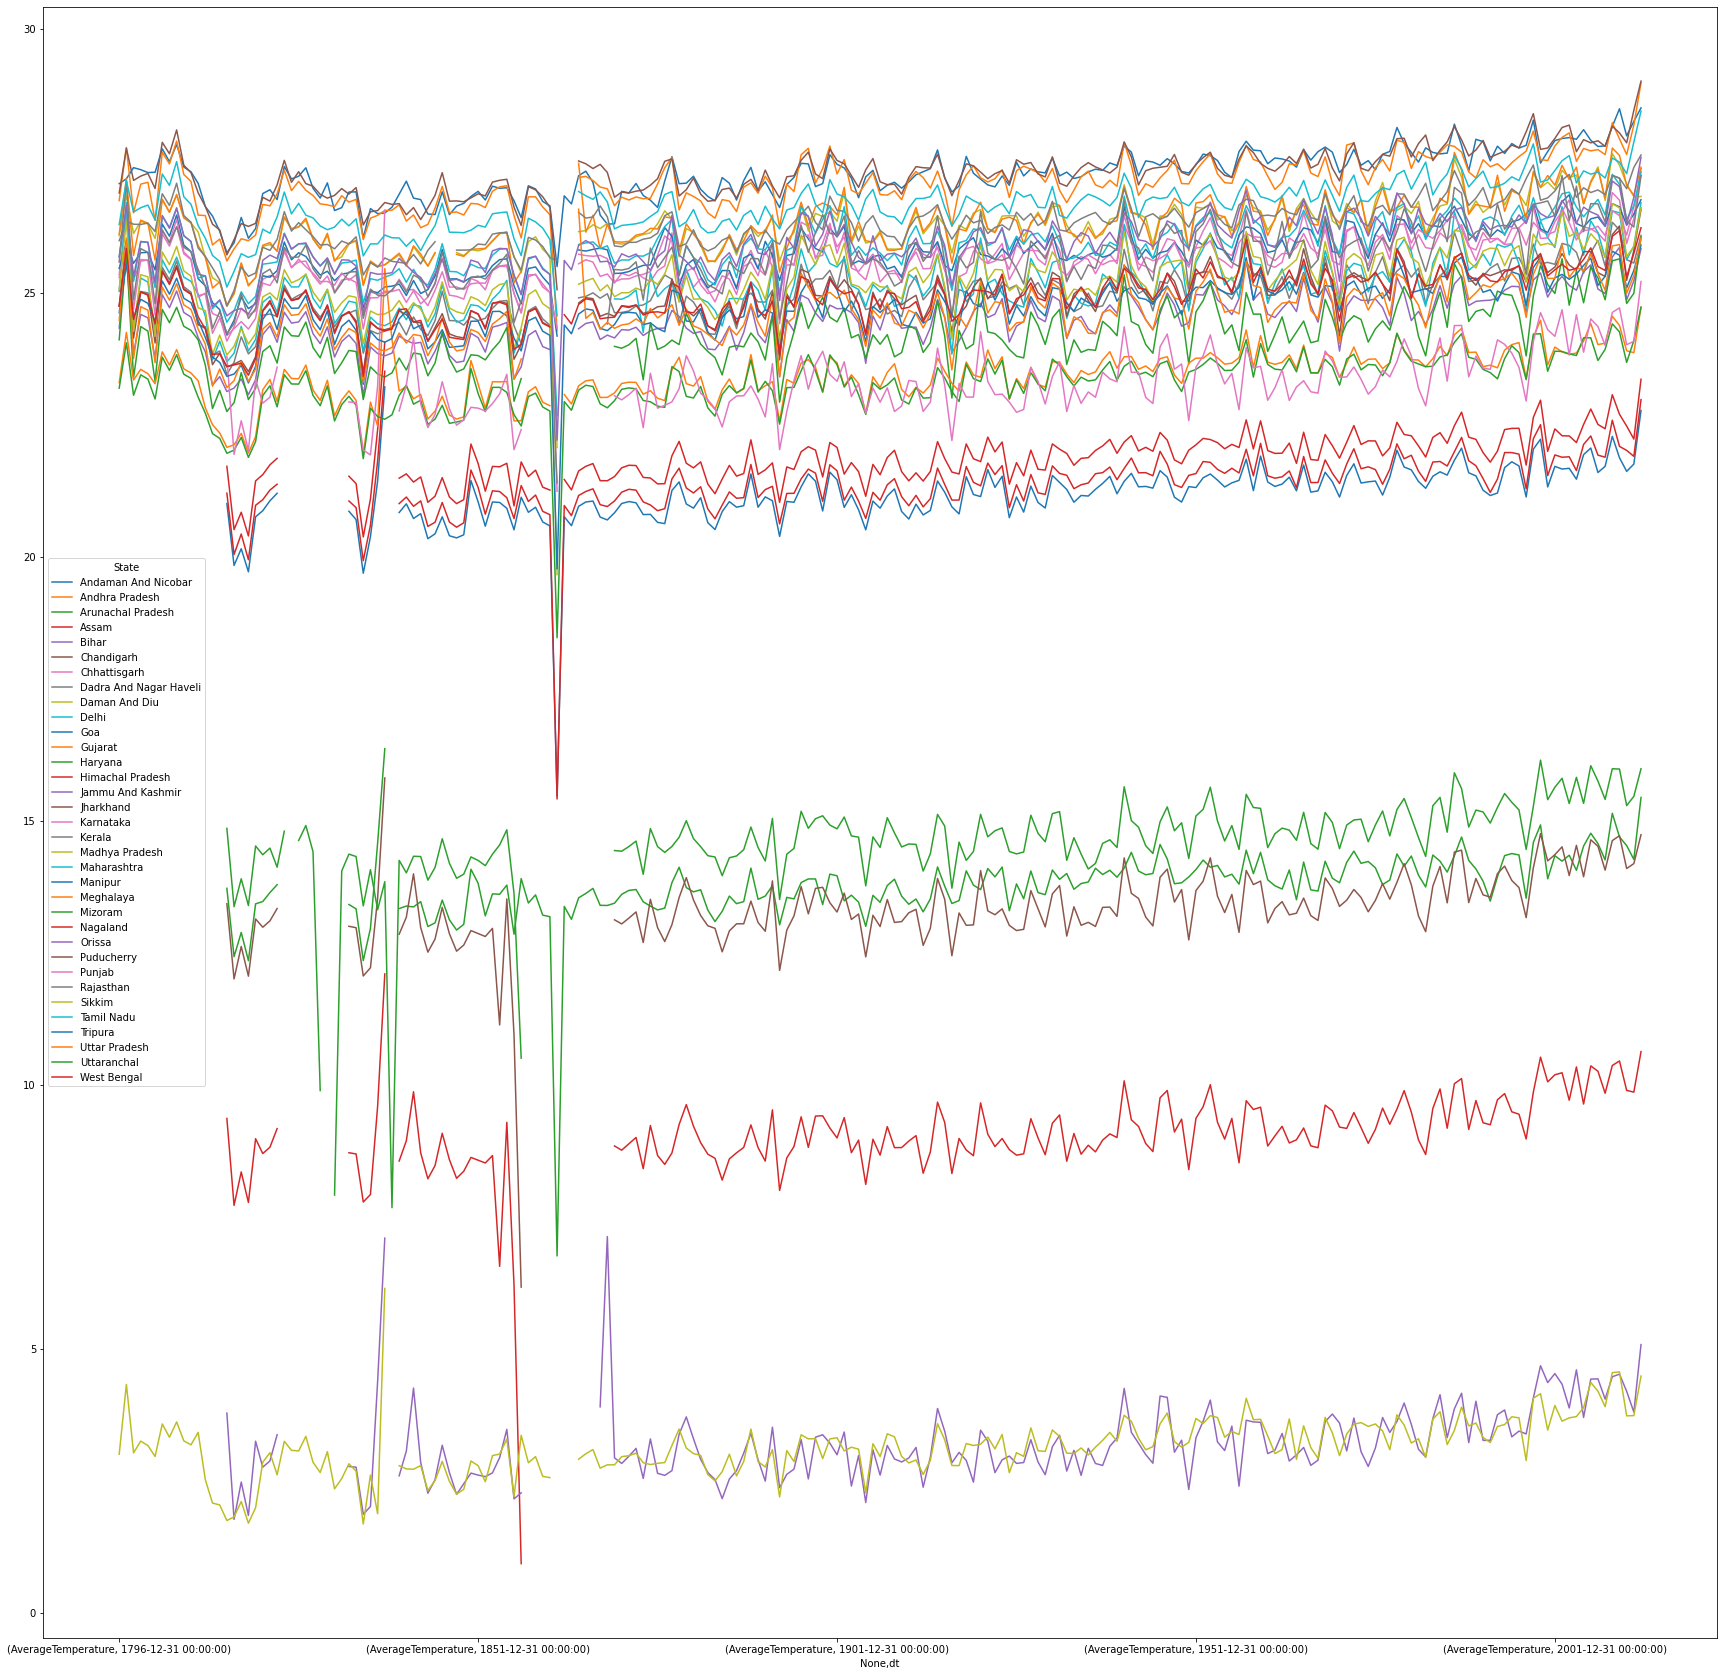

In [12]:
# Plotting the data to get different line charts on the 
# same graph depicting the trends in average temperature
u.plot(figsize=(30,30))

##### We see here that the data is very scattered and noisy with missing values for certain time periods for some states. But overall speaking, we see a consistent but small increase in average temperatures starting the 1950s. 

### Conclusion ###
Using the above data we see some inconsistencies in the average land temperatures till the late 1800s. Post 1900, we see a consistent yet gradual increase in the average land temperatures for all the states. While this increase is not very prominent and large in terms of the absolutele value, the correlation can be seen. This increasing temperature is a cause for alarm because we know that even a 1 degree Celsius increase in global temperature can be devastating for everything on this planet.

# <Center><h1> Project Two </h1></center>

## INTRODUCTION ##

In Project One we saw our research question that we aimed to answer was <b>determining if the average temperature in India increased over time. </b> In this Project, I will working towards answering the same question but I will improve upon my past graphs, and will be adding some new maps in order to make for a stronger argument for my research question.

## PART ONE ##

<blockquote> <h3> Trends in land temperature in different states in India </h3> 
<h3> Introduction </h3>
We will be considering the dataset "Climate Change: Earth Surface Temperature Data" which explores the global land temperatures since 1750. The data is retrieved from https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data. The data is compiled in several different files according to how it was collected and compiled. For example, the data is divided by  City, Major City, States, and Countries. The data published on Kaggle was a repackaged version of 1.6 billion temperatures combined by the Berkeley Earth Surface Temperature Study. 

For this particular notebook, I'll be noticing the trends in the average land temperature in different states of India. We will see if the average temperature (Y) in different states (X1) in India from the year 1796 to 2013 (X2). 

### Research Question - The question that I will aim to answer using the this data is whether we notice an increase in land temperatures in different states in India over time. 
</blockquote>

In [13]:
import pandas as pd
import numpy as np
import qeds
import matplotlib.pyplot as plt
# Read data into a dataframe called country_df
country_data_raw = pd.read_csv("GlobalLandTemperaturesByState.csv")
country_df = pd.DataFrame(country_data_raw)
# Cleaning the dataframe by first selecting only the data with the Country as India
cond_ = country_df["Country"].isin(["India"])

# Assigning the filtered data to a variable called india_data
india_data = country_df[cond_]

# Dropping the Country Name and Average Temperature Uncertainty columns from the data 
# and assigning it to a new variable called y
y = india_data.drop(columns=["AverageTemperatureUncertainty", "Country"])

# Dropping entries with no data and resetting index and assigning to variable 
# called new
y = y.dropna().reset_index()
new = y.copy()
new = new.drop(columns=["index"])

# Converting the date in the column dt to a uniform DateTimeIndex
dates = pd.DatetimeIndex(new['dt'])

new.loc[:, 'dt'] = dates
new

dt  AverageTemperature                State
0     1796-01-01              26.534  Andaman And Nicobar
1     1796-02-01              26.294  Andaman And Nicobar
2     1796-03-01              26.180  Andaman And Nicobar
3     1796-04-01              27.942  Andaman And Nicobar
4     1796-05-01              28.651  Andaman And Nicobar
...          ...                 ...                  ...
81615 2013-01-04              28.707          West Bengal
81616 2013-01-05              29.694          West Bengal
81617 2013-01-06              29.628          West Bengal
81618 2013-01-07              29.115          West Bengal
81619 2013-01-08              28.686          West Bengal

[81620 rows x 3 columns]

The above Dataframe 'new' shows yearly average temperature for the different states in India

### Summary Statistics ###
The summary statistics of average temperature, average temperature of each state, and average temperature of each year.

In [14]:
# Summary statistics of average temperature
new.describe()

AverageTemperature
count        81620.000000
mean            22.534576
std              7.749321
min            -11.984000
25%             19.063000
50%             25.094500
75%             27.628000
max             36.339000

The above table represents the Summary Statistics of the Average Temperature from the DataFrame 'new'.

In [15]:
# Average temperature over the years by State
state_temp = new[["State", "AverageTemperature"]].groupby("State").mean()
state_temp

AverageTemperature
State                                     
Andaman And Nicobar              27.231677
Andhra Pradesh                   27.090003
Arunachal Pradesh                13.795670
Assam                            21.875561
Bihar                            24.486945
Chandigarh                       13.381667
Chhattisgarh                     25.589014
Dadra And Nagar Haveli           24.969918
Daman And Diu                    26.274003
Delhi                            25.165861
Goa                              25.755925
Gujarat                          26.296188
Haryana                          24.236843
Himachal Pradesh                  9.098241
Jammu And Kashmir                 3.204062
Jharkhand                        24.929374
Karnataka                        25.622263
Kerala                           26.319626
Madhya Pradesh                   25.261987
Maharashtra                      25.933388
Manipur                          21.186684
Meghalaya                        23.438018
Mizoram                          23.315388
Nagaland                         21.398759
Orissa                           25.927605
Puducherry                       27.266897
Punjab                           23.338020
Rajasthan                        25.725266
Sikkim                            3.149101
Tamil Nadu                       26.667812
Tripura                          24.750007
Uttar Pradesh                    24.645434
Uttaranchal                      14.697141
West Bengal                      24.915779

The above table shows the average temperature for all the states in India (averaged from 1796 to 2013)

In [16]:
# Average temperature by year
yearly_temp = new.groupby(pd.Grouper(key="dt", freq="A")).mean().dropna()
yearly_temp

AverageTemperature
dt                            
1796-12-31           24.388083
1797-12-31           25.407240
1798-12-31           24.129472
1799-12-31           24.663863
1800-12-31           24.629430
...                        ...
2009-12-31           23.468466
2010-12-31           23.387196
2011-12-31           22.821696
2012-12-31           23.007659
2013-12-31           23.720890

[213 rows x 1 columns]

The above table shows average temperature for the India each year. 

In [17]:
# Creating a final copy of data where it is sorted by Year and State.
# Gives the average temperature for each state that year
final_data = new.groupby([pd.Grouper(key='dt', freq='A'), 
                          pd.Grouper(key = 'State')]).mean().copy()
final_data

AverageTemperature
dt         State                                     
1796-12-31 Andaman And Nicobar              27.070833
           Andhra Pradesh                   26.750750
           Bihar                            24.334167
           Chhattisgarh                     25.349167
           Dadra And Nagar Haveli           24.750333
...                                               ...
2013-12-31 Tamil Nadu                       28.445375
           Tripura                          25.909250
           Uttar Pradesh                    26.044250
           Uttaranchal                      15.991125
           West Bengal                      26.237375

[6878 rows x 1 columns]

The above DataFrame 'final_data' shows the average temperature for each individual state every year.

### Plotting the relation between Y and the different Xs separately ###

<AxesSubplot:title={'center':'Average Temperature over the Years'}, xlabel='Years', ylabel='Average Temperature'>

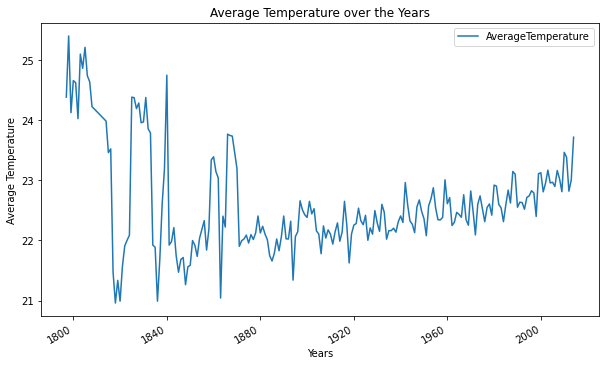

In [18]:
# Creating a line graph of X2 (Years) and Y (average temperature)
yearly_temp.plot(figsize=(10,6), title="Average Temperature over the Years", xlabel='Years', ylabel='Average Temperature')

The above graph depicts a line graph with the Years on the x axis and the average temperatures on the Y axis. The graph shows some extreme points up until 1870s. Post that we see a gradual increase in the average temperatures over the years.

<AxesSubplot:title={'center':'Average Temperature of individual states'}, xlabel='States', ylabel='Average Temperature'>

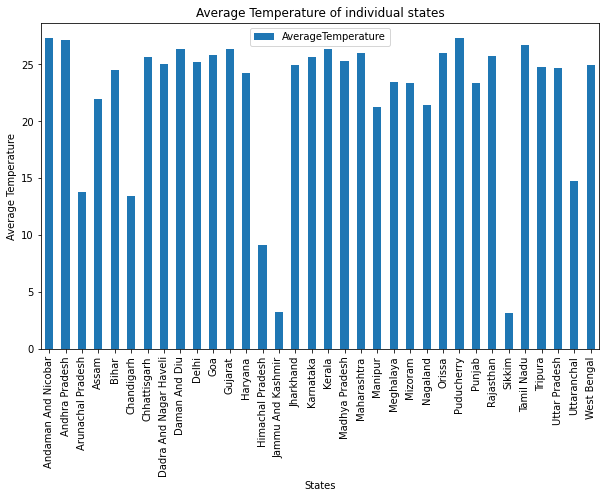

In [19]:
# Creating a bar graph of X1 (States) and Y (average temperature)
state_temp.plot(figsize=(10,6), kind="bar", title="Average Temperature of individual states", xlabel='States', ylabel='Average Temperature')

The graph depicts the temperature of different states in India averaged over the years. We don't notice any trend here, probably because the data here has no time component to it. The temperatures are averaged over all the years. 

In [20]:
# Here we are transposing the data so that we can get the date on the y-axis
u = final_data.unstack(level=0).T
u

State                          Andaman And Nicobar  Andhra Pradesh  \
                   dt                                                
AverageTemperature 1796-12-31            27.070833       26.750750   
                   1797-12-31            27.163400       27.755800   
                   1798-12-31            27.374600       26.518800   
                   1799-12-31            27.336167       27.062417   
                   1800-12-31            27.281167       27.097417   
...                                            ...             ...   
                   2009-12-31            28.153917       28.223917   
                   2010-12-31            28.489833       27.918667   
                   2011-12-31            27.976500       27.624083   
                   2012-12-31            28.251083       28.180083   
                   2013-12-31            28.505875       28.980625   

State                          Arunachal Pradesh      Assam      Bihar  \
                   dt                                                    
AverageTemperature 1796-12-31                NaN        NaN  24.334167   
                   1797-12-31                NaN        NaN  25.722600   
                   1798-12-31                NaN        NaN  23.846300   
                   1799-12-31                NaN        NaN  24.594917   
                   1800-12-31                NaN        NaN  24.531250   
...                                          ...        ...        ...   
                   2009-12-31          15.147250  23.074500  25.682167   
                   2010-12-31          14.699167  22.704167  25.865000   
                   2011-12-31          14.535417  22.480667  24.871000   
                   2012-12-31          14.274417  22.235000  25.231250   
                   2013-12-31          15.447750  23.367375  25.844875   

State                          Chandigarh  Chhattisgarh  \
                   dt                                     
AverageTemperature 1796-12-31         NaN     25.349167   
                   1797-12-31         NaN     26.481200   
                   1798-12-31         NaN     24.697600   
                   1799-12-31         NaN     25.634667   
                   1800-12-31         NaN     25.619500   
...                                   ...           ...   
                   2009-12-31   14.629833     26.901167   
                   2010-12-31   14.723250     26.759167   
                   2011-12-31   14.101333     25.935667   
                   2012-12-31   14.194417     26.410333   
                   2013-12-31   14.741875     27.355250   

State                          Dadra And Nagar Haveli  Daman And Diu  \
                   dt                                                  
AverageTemperature 1796-12-31               24.750333      26.087083   
                   1797-12-31               25.624700      26.857600   
                   1798-12-31               24.411100      26.127200   
                   1799-12-31               25.029500      26.357167   
                   1800-12-31               25.001583      26.311333   
...                                               ...            ...   
                   2009-12-31               26.339833      27.637417   
                   2010-12-31               26.196917      27.420750   
                   2011-12-31               25.633833      27.061083   
                   2012-12-31               25.566583      26.825417   
                   2013-12-31               26.093375      26.827375   

State                              Delhi  ...     Orissa  Puducherry  \
                   dt                     ...                          
AverageTemperature 1796-12-31  25.030250  ...  25.692833   26.894583   
                   1797-12-31  26.711900  ...  26.664600   27.741600   
                   1798-12-31  24.289700  ...  25.314000   27.132900   
                   1799-12-31  25.284167  ...  25.977667   27

The above DataFrame 'u' is just the the DataFrame 'final_data' but the x and the y labels shifted. So we have a MultiIndex - 'AverageTemperature and Date' as the Index - and the States as the Columns

<AxesSubplot:title={'center':'Average Temperature for each individual state over the years'}, xlabel='Years', ylabel='Average Temperature'>

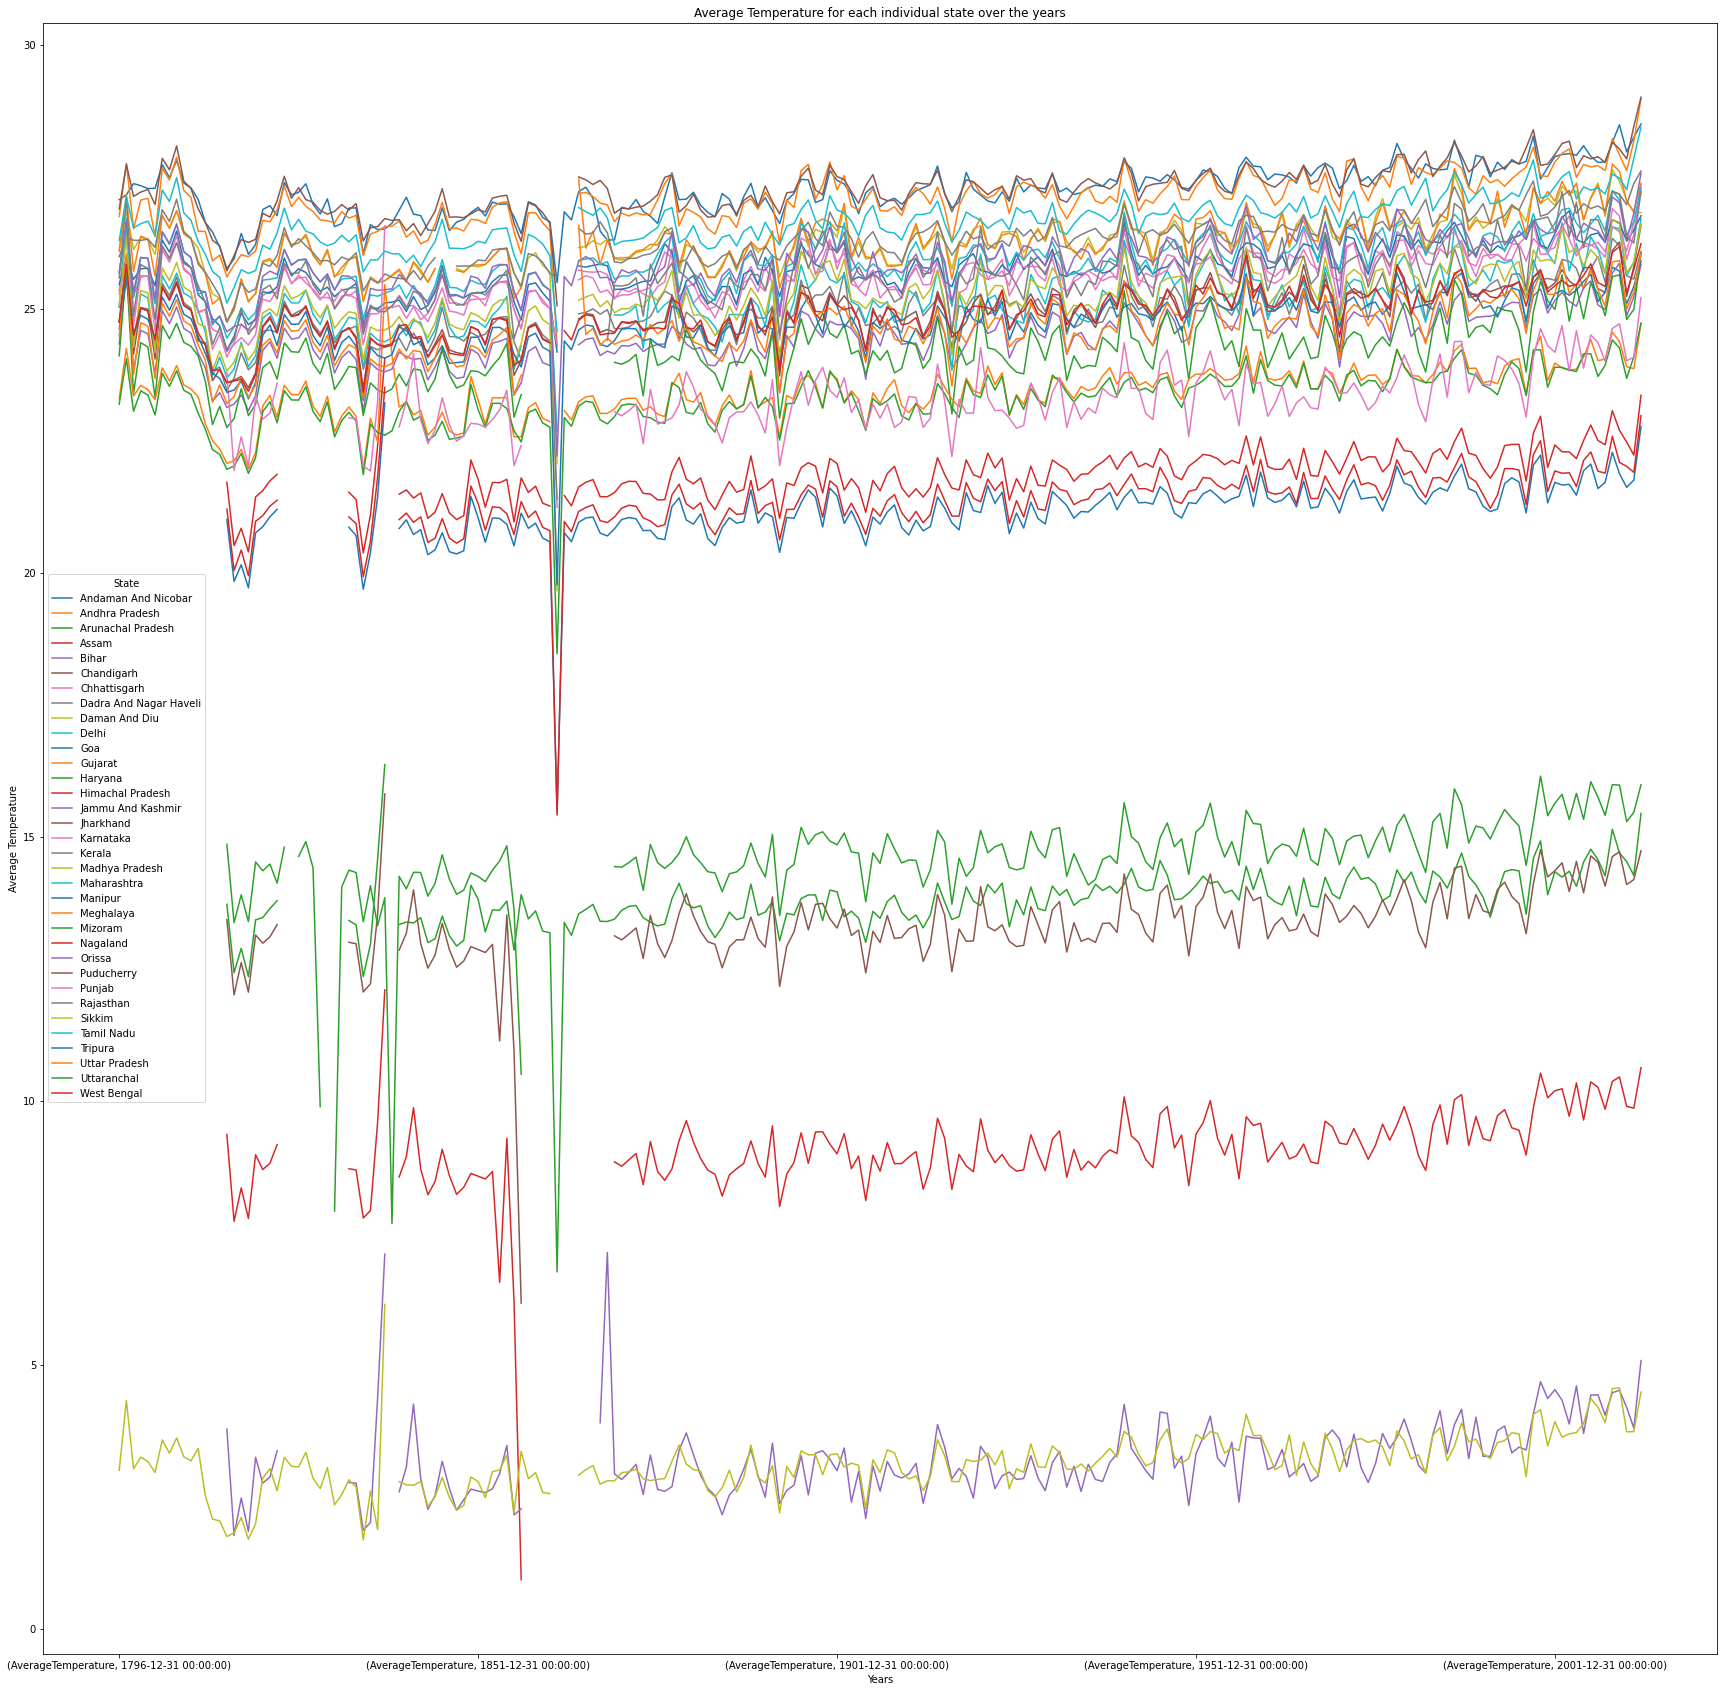

In [21]:
# Plotting the data to get different line charts on the 
# same graph depicting the trends in average temperature
u.plot(figsize=(30,30), xlabel="Years", ylabel="Average Temperature", title="Average Temperature for each individual state over the years")

We see here that the data is very scattered and noisy with missing values for certain time periods for some states. But overall speaking, we see a consistent but small increase in average temperatures starting the 1950s. 


### <blockquote> Conclusion ###
Using the above data we see some inconsistencies in the average land temperatures till the late 1800s. Post 1900, we see a consistent yet gradual increase in the average land temperatures for all the states. While this increase is not very prominent and large in terms of the absolutele value, the correlation can be seen. This increasing temperature is a cause for alarm because we know that even a 1 degree Celsius increase in global temperature can be devastating for everything on this planet.
My research question was aimining to answer if the average temperatures in India increased from the late 1700s to the current date and we see that there has been a small but consistent increase since the 1950s.

## PART TWO ##

### <blockquote>THE MESSAGE! ###
The main message or the research question of this paper that I aim to answer is to determine whether or not the average temperature in India, specifically all the states in India, has increased from the years 1796 to 2013. </blockquote>

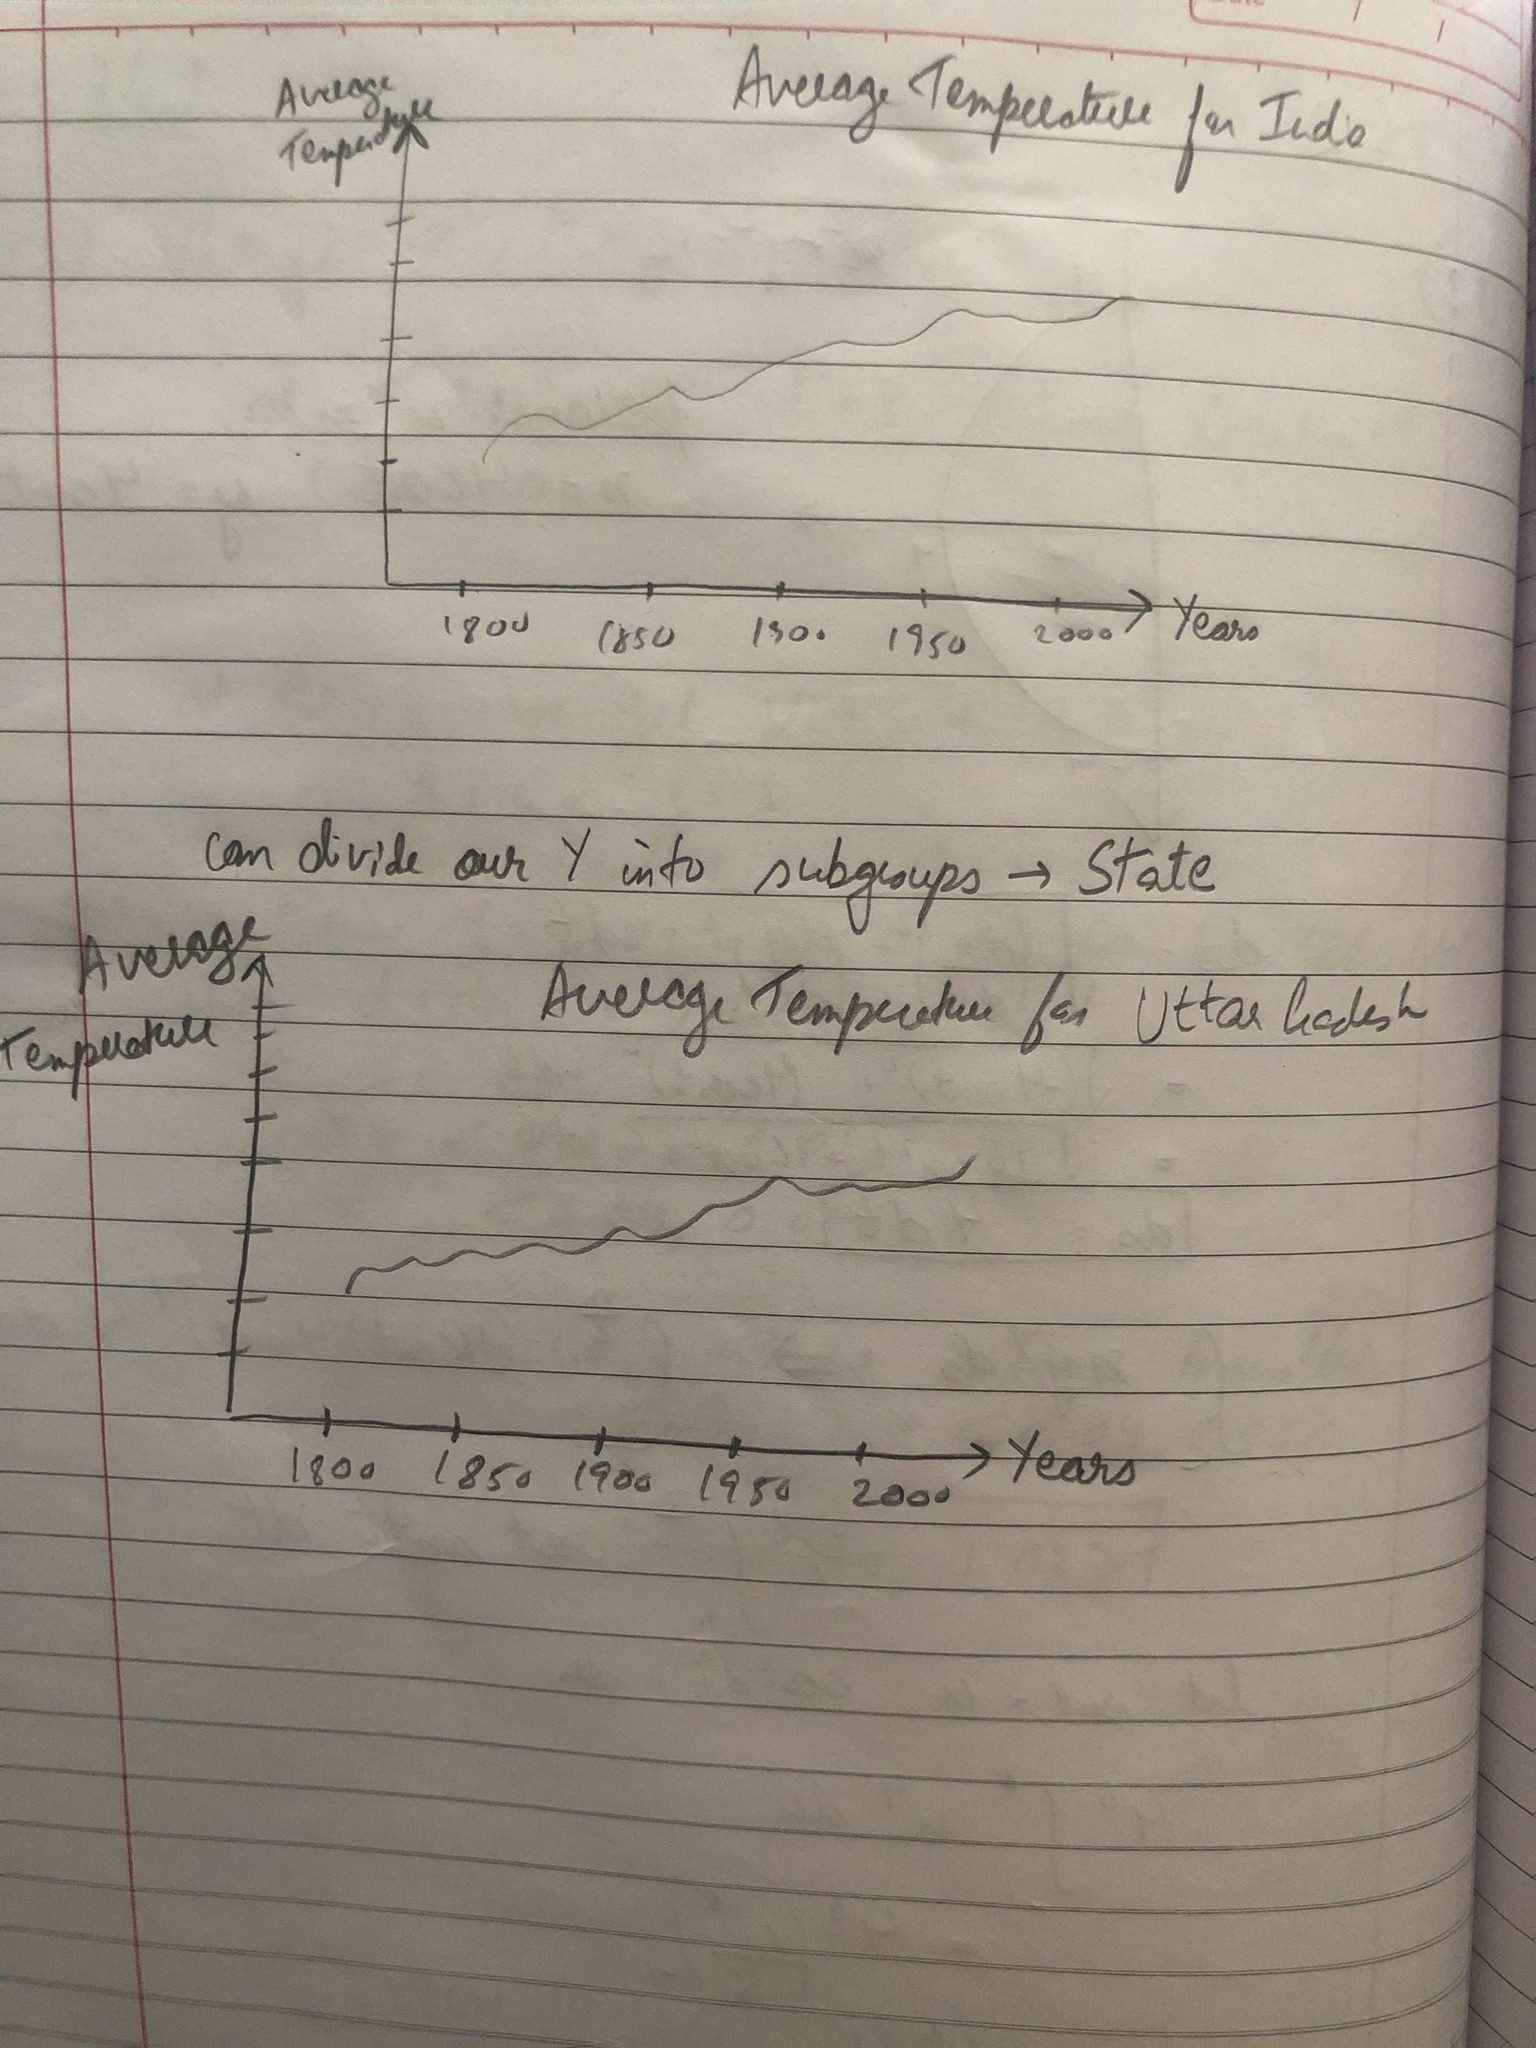

In the image we see the best way to answer our research question is through a line plot which records the trends of the average temperature of the country, as well as individual states. Below there is one line plot that was made in Project One. 

<AxesSubplot:title={'center':'Average Temperature over the Years'}, xlabel='Years', ylabel='Average Temperature'>

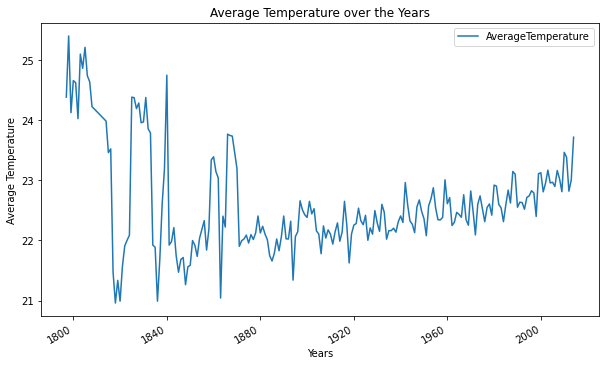

In [22]:
# Creating a line graph of X2 (Years) and Y (average temperature)
yearly_temp.plot(figsize=(10,6), title="Average Temperature over the Years", xlabel='Years', ylabel='Average Temperature')

The above line plot depicts the increase in average temperatures since the 1900s. This pattern does depict that the entire country is warming up slowly. 

Given below are the individual graphs for each of the state and their average temperatures. 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
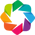

:HoloMap   [State]
   :Curve   [dt]   (AverageTemperature)

In [23]:
# !pip install "holoviews[recommended]"
import holoviews as hv
from holoviews import dim, opts

hv.extension('bokeh')
vdims = [('AverageTemperature', 'Average Temperature')]
table = hv.Dataset(final_data, ['dt', 'State'], vdims)
layout = (table.to(hv.Curve, 'dt', 'AverageTemperature'))
layout.opts(
    opts.Curve(width=600, height=250, framewise=True))

The above line plot matrix enables us to view each individual states' average temperature over the years. This helps us see a very clear trend that points towards an increasing average temperature in majority of the states in India. 

## PART THREE ##
<blockquote> This part of the project will see some maps that will help me towards my argument and research question as mentioned in the previous part. 
    
<b> Note - Due to GeoPandas error, I will be attaching screenshots of my maps at the end of this pdf. The maps were working on Google Colab but due to them being hover maps, i was unable to download them directly from the Google Colab. The Google Colab notebook can be found here - https://colab.research.google.com/drive/1ZiQsQ4fALLeHaSM1wKJS7_T-KOgzws38?usp=sharing
        Due to GeoPandas Error, the maps aren't working on Jupyter Notebook and therefore I wasn't able to download them as a HTML file either. </b>

In [26]:
# !pip install plotly==4.14.3
# !pip install geopandas fiona pyproj rtree shapely pygeos
import numpy as np
import qeds
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

OSError: could not find or load spatialindex_c-64.dll

#### Map of Average Temperature in different states of India (Averaged from 1796 to 2013) ####

In [ ]:
state_temp = new[["State", "AverageTemperature"]].groupby("State").mean()
zipfile = "zip:////content/India_States_ADM1_GADM-shp.zip"
india_df = gpd.read_file(zipfile)


# Helper Function to plot all Choropleth maps in Part Three
def plot_choropleth (main_df, state_df, title):
  """
  This function helps in creating Choropleth maps
  """
  # merge the two data frames into one then merge into GeoPandas Dataframe
  merged = pd.merge(main_df, state_df, left_on="NAME_1", right_on="State")
  merged.drop(merged.columns.difference(['AverageTemperature', 'NAME_1', 'geometry']), 1, inplace=True)
  gdf_i = gpd.GeoDataFrame(merged, crs=4326, geometry='geometry')
  # plot the map
  fig = px.choropleth(data_frame=gdf_i, geojson=gdf_i.geometry, 
                      locations=gdf_i.index, color='AverageTemperature', 
                      color_continuous_scale='Turbo', hover_name=gdf_i.NAME_1, 
                      title=title)
  fig.update_geos(fitbounds="locations", visible=False)
  fig.show()

m1 = plot_choropleth(india_df, state_temp, 'Average Temperatures in different states of India')
m1

In the above map, we see a the average temperature of the country taken from the years 1976 to 2013. We see a stark difference in the average temperatures in the different states but it doesn't really help us see the presence of global warming. 

#### Two Choropleth maps on India (1970 and 2010) depicting the average temperature for the states in that year ####

In [ ]:
# Filtering data to only include data from the years 1970 and 2010 in two new variables - new_1970 and new_2010
new['Year'] = pd.DatetimeIndex(new['dt']).year
new_2010 = new[new['Year'] == 2010]
new_1970 = new[new['Year'] == 1970]

# Taking averages for the states for that year and storing them in new variables
state_temp_1970 = new_1970[["State", "AverageTemperature"]].groupby("State").mean()
state_temp_2010 = new_2010[["State", "AverageTemperature"]].groupby("State").mean()

# Plotting both the maps
plot_choropleth(india_df, state_temp_1970, 'Average Temperatures in different states of India in the year 1970')
plot_choropleth(india_df, state_temp_2010, 'Average Temperatures in different states of India in the year 2010')

When we compare the above two graphs which depict the average temperatures for the different states in the country in two different years (1970 and 2010), we see a mild yet visible difference in most of the states color. Majority of the states have a darker color to them in the year 2010 as compared to the year 1970. This indicates that the year 2010 was warmer than the year 1970.

## CONCLUSION ##
To conclude the second project, we saw more convincing arguments to answer the research question of whether the average temperatures in the country have increased or not. We very clearly see through the individual state line plots, as well as the choropleth maps, that the average temperatures have increased by a bit which is a cause for alarm. This is a cause for alarm because climate emergency has been declared in many countries around the world and even a small increase in average temperatures of 1 degrees can have huge impacts on the world as we know. 